[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


YEAR                 LEXICAL_DIVERSITY    MSL                  BIG_WORDS            LEXICAL_DENSITY     
1952.txt             0.4296875            32.0                 1.171875             0.4732272069464544  
1953.txt             0.4198782961460446   28.17142857142857    1.3184584178498986   0.5267260579064588  
1954.txt             0.480225988700565    32.18181818181818    1.1299435028248588   0.5289514866979655  
1955.txt             0.4371327849588719   24.314285714285713   1.2925969447708578   0.5032594524119948  
1956.txt             0.41770833333333335  32.0                 1.3541666666666667   0.49943117178612056 
1957.txt             0.4343065693430657   24.176470588235293   0.6082725060827251   0.5119047619047619  
1958.txt             0.41559953434225844  25.264705882352942   1.1641443538998837   0.5186136071887034  
1960.txt             0.48014440433212996  25.181818181818183   2.707581227436823    0.5185909980430529  
1961.txt             0.4964788732394366   24.7391304347

<IPython.core.display.Javascript object>


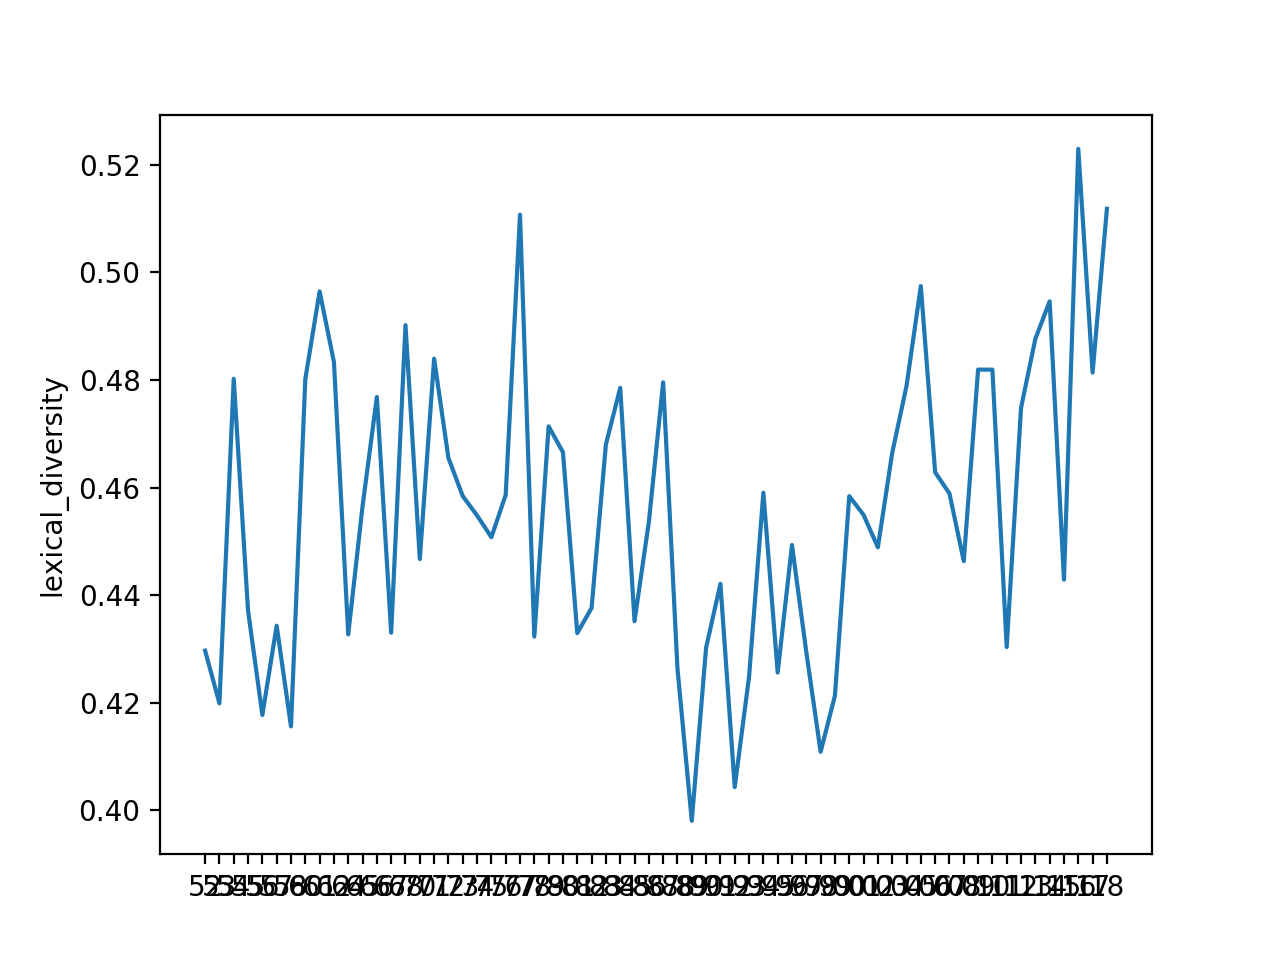

<IPython.core.display.Javascript object>


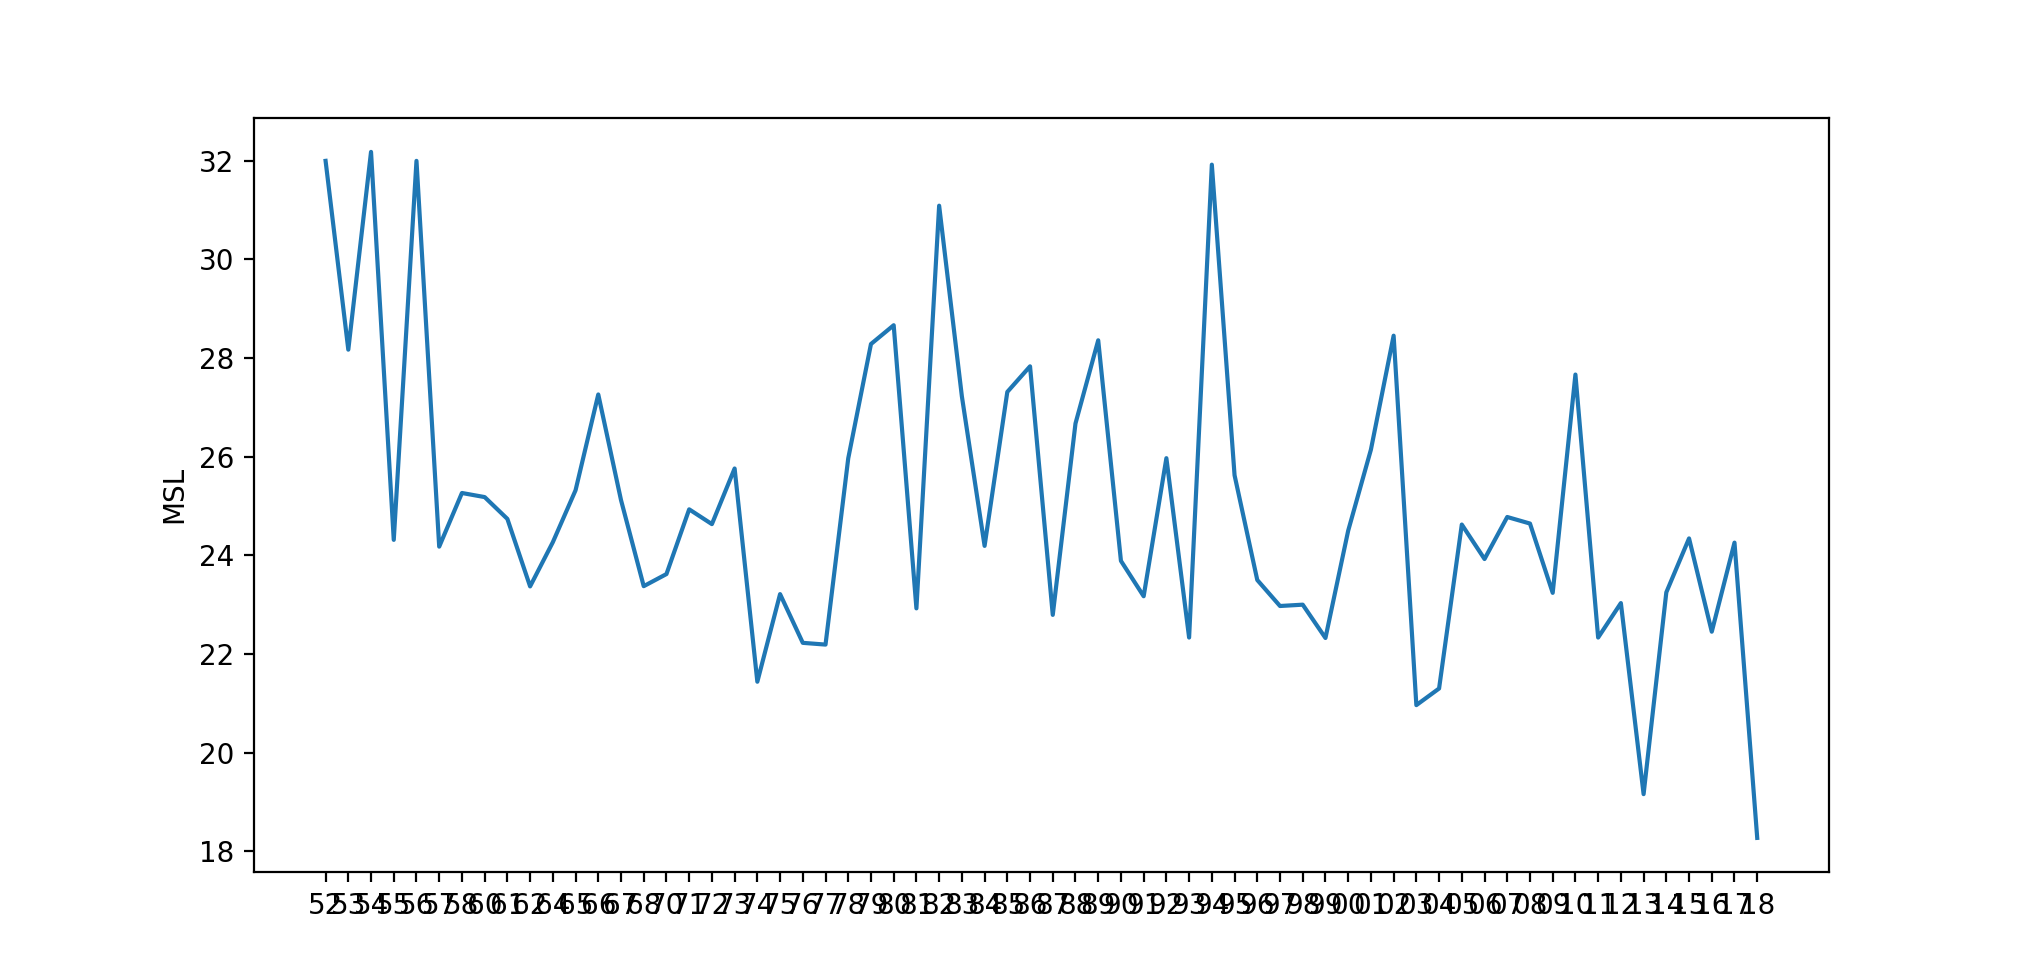

<IPython.core.display.Javascript object>


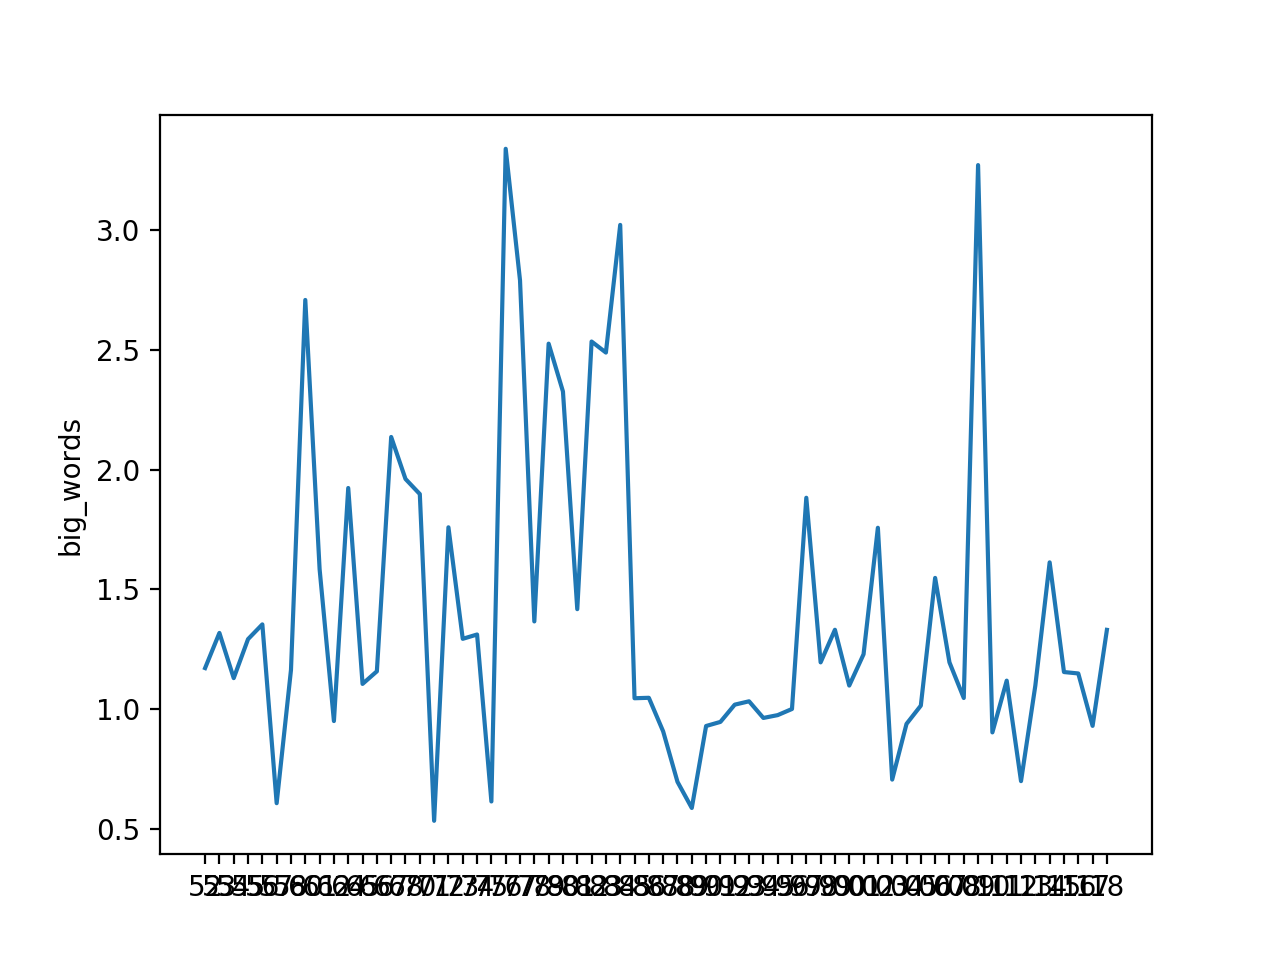

<IPython.core.display.Javascript object>


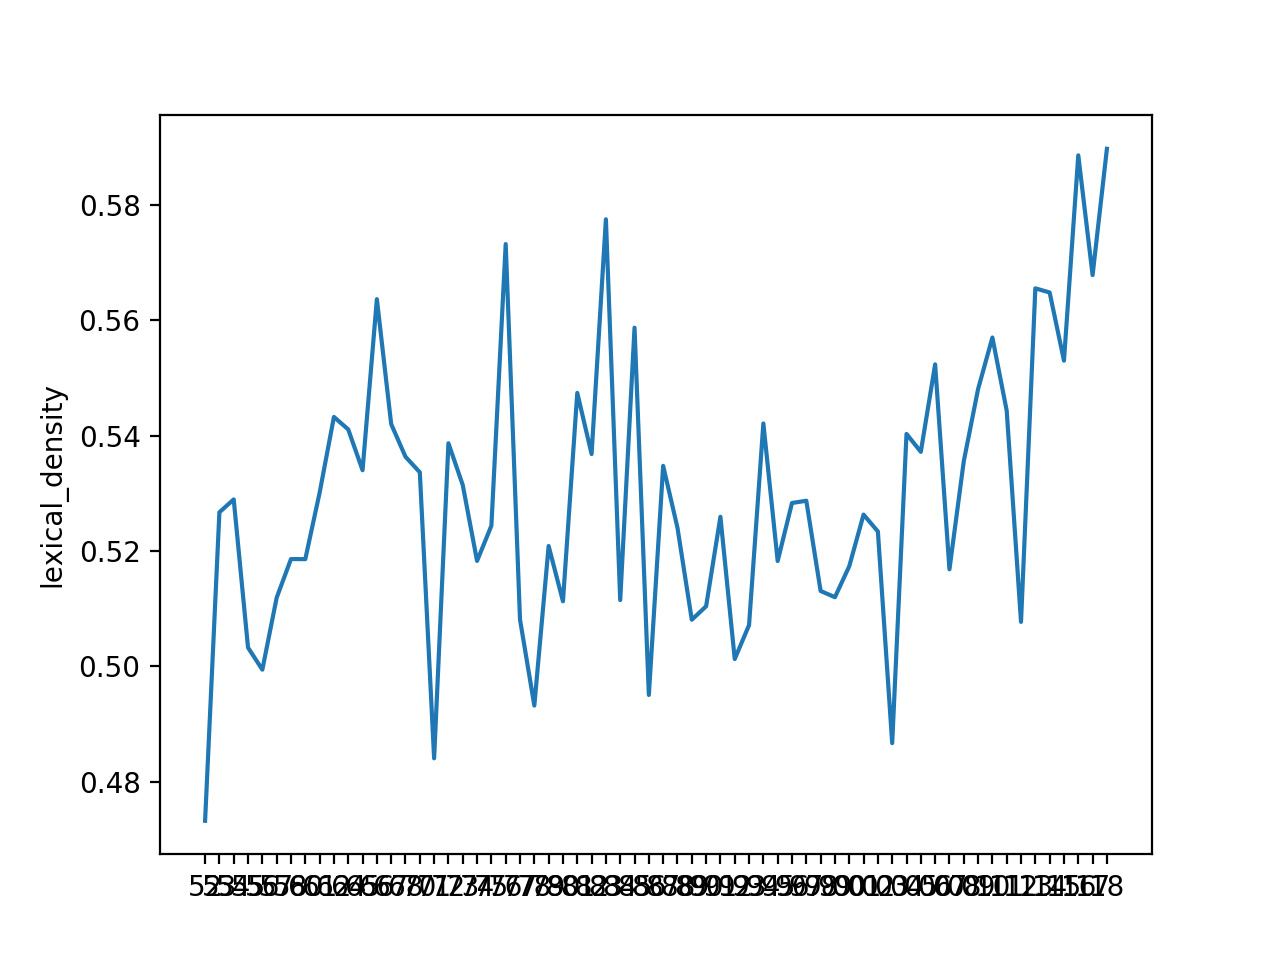

<IPython.core.display.Javascript object>


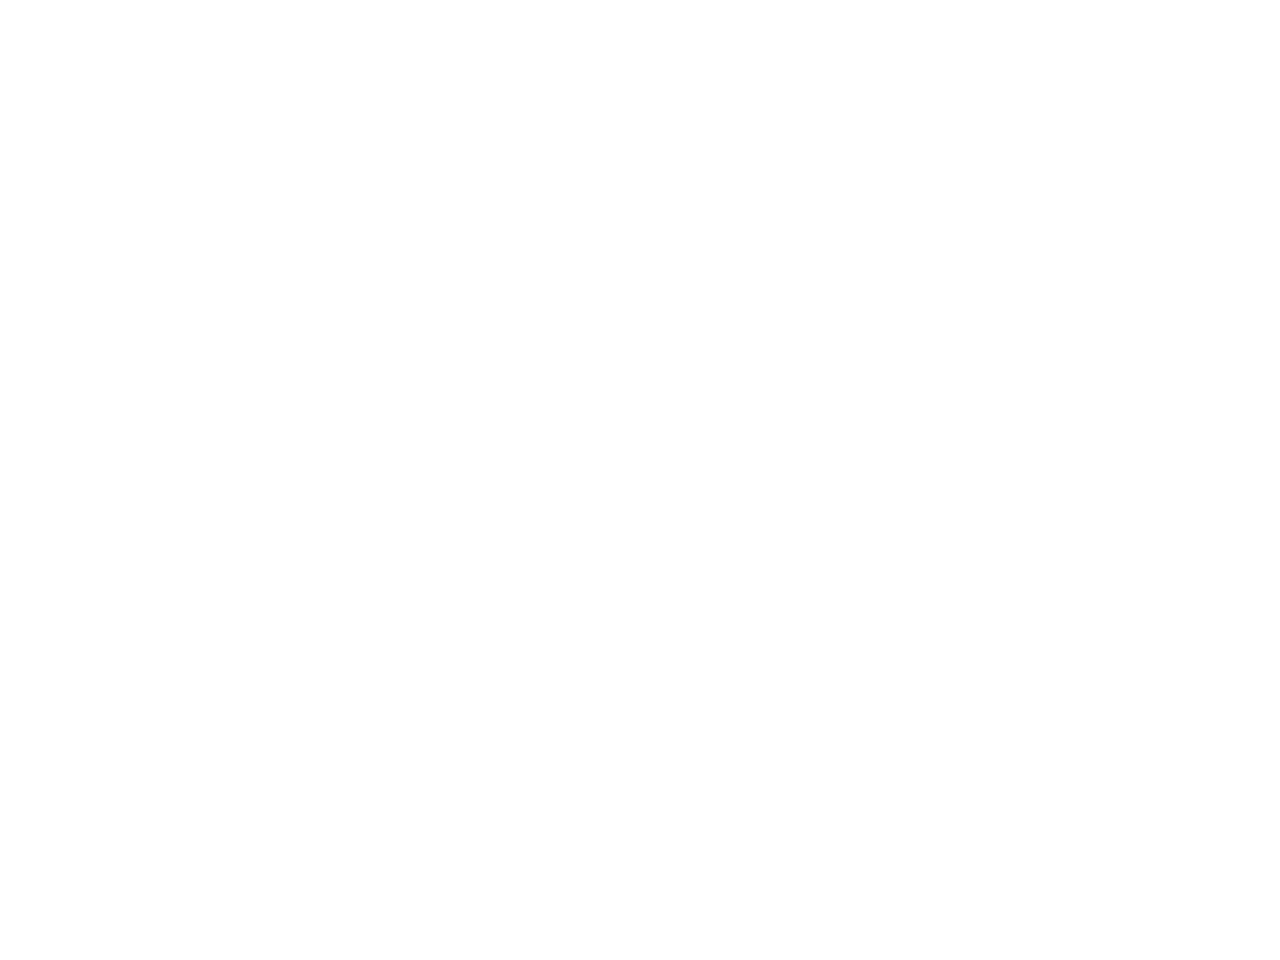

In [19]:
from __future__ import division
%matplotlib notebook
import nltk
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

def lexical_diversity(text): #type-token ratio
    return len(set(text)) / len(text)

def mean_sentence_length(sents):
    avg = sum(len(word) for word in sents) / len(sents)
    return avg

def big_words(text):
    count = 0

    for words in text:
        if len(words) > 11:
            count += 1

    return (count/len(text))*100

def lexical_density(text):
    pos_words = nltk.pos_tag(text)
    lexical_count = 0
    word_count = 0

    for word in pos_words:
        if word[1] == 'VB' or word[1] == 'FW' or word[1] == 'JJ' \
        or word[1] == 'JJR' or word[1] == 'JJS' or word[1] == 'NN' \
        or word[1] == 'NNP' or word[1] == 'NNPS' or word[1] == 'NNS' \
        or word[1] == 'RB' or word[1] == 'RBR' or word[1] == 'RBS' \
        or word[1] == 'UH' or word[1] == 'VBD' or word[1] == 'VBG' \
        or word[1] == 'VBN' or word[1] == 'VBP' or word[1] == 'VBZ':
            lexical_count += 1


        if word[1] != '$' and word[1] != '"' and word[1] != '(' \
        and word[1] != ')' and word[1] != ',' and word[1] != '--' \
        and word[1] != '.' and word[1] != ':' and word[1] != 'SYM' \
        and word[1] != '``':
            word_count += 1


    return lexical_count/word_count


def main():
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    file_name = sys.argv[1]
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()

    print("{: <20} {: <20} {: <20} {: <20} {: <20}".format('YEAR', 'LEXICAL_DIVERSITY', 'MSL', 'BIG_WORDS', 'LEXICAL_DENSITY'))

    div_list = []
    msl_list = []
    bw_list = []
    dens_list = []
    
    big_table_data = []
    for f in files:

        one = lexical_diversity(newcorpus.words(f))
        div_list.append(one)
        two = mean_sentence_length(newcorpus.sents(f))
        msl_list.append(two)
        three = big_words(newcorpus.words(f))
        bw_list.append(three)
        four = lexical_density(nltk.word_tokenize(newcorpus.raw(f)))
        dens_list.append(four)

        big_table_data.append([f, one, two, three, four])


    for row in big_table_data:
        print("{: <20} {: <20} {: <20} {: <20} {: <20}".format(*row))
    
    #change this to years against each thing 
    
    x = ['52', '53', '54', '55', '56', '57', '58', '60', '61', '62', '64', '65', '66', '67', '68', '70', '71', '72', 
         '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
         '91', '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08',
         '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']

    plt.plot(x, div_list)
    plt.ylabel('lexical_diversity')
    plt.show()
    plt.figure()
    
    plt.plot(x, msl_list)
    plt.ylabel('MSL')
    plt.show()
    plt.figure()
    
    plt.plot(x, bw_list)
    plt.ylabel('big_words')
    plt.show()
    plt.figure()
    
    plt.plot(x, dens_list)
    plt.ylabel('lexical_density')
    plt.show()
    plt.figure()
    
if __name__ == "__main__":
    main()

